# Construction of an Adjacency Matrix

This example is a reproduction of this [Biotite's Example](https://www.biotite-python.org/examples/gallery/structure/adjacency_matrix.html#sphx-glr-examples-gallery-structure-adjacency-matrix-py)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors
from crimm.Fetchers import fetch_rcsb
from scipy.spatial.distance import pdist, squareform

In [8]:
struct = fetch_rcsb("1aki", include_solvent=False)

In [9]:
struct

NGLWidget()

<Structure id=1AKI Models=1>
│
├───<Model id=1 Chains=1>
	│
	├───<Polypeptide(L) id=A Residues=129>
	├──────Description: LYSOZYME


In [10]:
# Get only CA carbons
CA_coords = np.array([a.coord for a in struct.get_atoms() if a.name == 'CA'])
CA_dists = squareform(pdist(CA_coords))

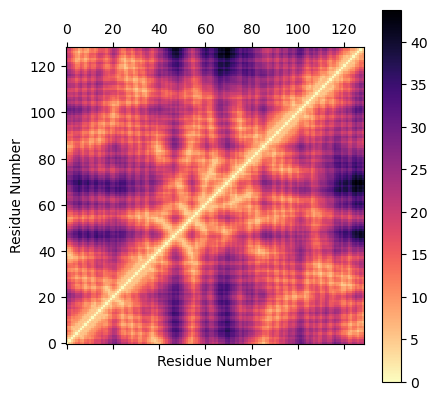

In [11]:
plt.matshow(CA_dists, cmap='magma_r')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Residue Number')
plt.ylabel('Residue Number')
plt.show()

In [12]:
# 7 Angstrom adjacency threshold
threshold = 7
adjacency_mat = CA_dists<threshold

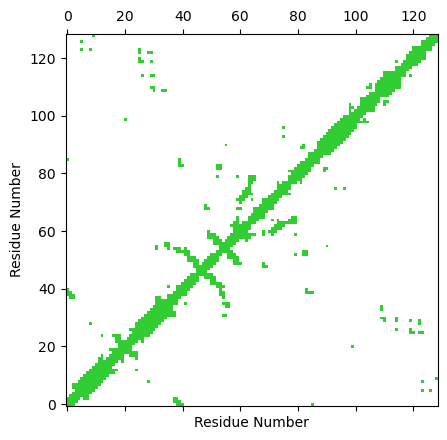

In [13]:
cmap = matplotlib.colors.ListedColormap(['white', 'limegreen'])
plt.matshow(adjacency_mat, cmap = cmap)
plt.gca().invert_yaxis()
plt.xlabel('Residue Number')
plt.ylabel('Residue Number')
plt.show()